![Title](1580801532(1).jpg)

![Title](1580815742(1).jpg)

![Title](1580815818(1).jpg)

![Title](1580815889(1).jpg)

![Title](1580815949(1).jpg)

![Title](1580815990(1).jpg)

In [1]:
#我们可以使用sklearn中的式子来可视化我们的决策边界，支持向量，以及决策边界平行的两个超平面
from sklearn.datasets import make_blobs  #制造数据
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#实例化数据集，可视化数据集
X,y = make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6) #50个样本，两个中心，粗的方差是0.6
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") #第一列作为横坐标第二列纵坐标 颜色y 大小50 颜色rainbow
plt.xticks([])#横纵坐标都显示为空
plt.yticks([])
plt.show()

<Figure size 640x480 with 1 Axes>

![Title](1580915544(1).jpg)

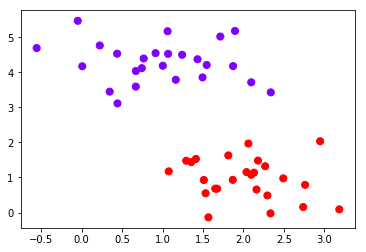

In [2]:
'''画决策边界，理解函数contour
matplotlib.axes.Axes.contour([X, Y,] Z, [levels], **kwargs)
Contour是我们专门用来绘制等高线的函数。等高线，本质上是在二维图像上表现三维图像的一种形式，其中两维X和Y是两
条坐标轴上的取值，而Z表示高度。Contour就是将由X和Y构成平面上的所有点中，高度一致的点连接成线段的函数，在同一
条等高线上的点一定具有相同的Z值。我们可以利用这个性质来绘制我们的决策边界'''

#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图  就是上面的散点图

'''画决策边界：制作网格，理解函数meshgrid'''
#获取平面上两条坐标轴上的最大值和最小值
xlim = ax.get_xlim() #xlim返回两个数 x轴上的最小值和最大值
ylim = ax.get_ylim()

#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30) #在x的最小点和最大点之前取三十个点
axisy = np.linspace(ylim[0],ylim[1],30)

axisy,axisx = np.meshgrid(axisy,axisx) #将两个一维向量转换为网格样式的特征矩阵
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y
#使用meshgrid函数将两个一维向量转换为特征矩阵
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的

In [3]:
axisx.shape

(30, 30)

In [4]:
axisy.ravel().shape

(900,)

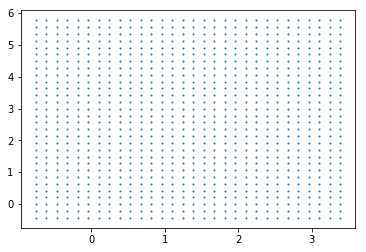

In [5]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点 900个 30个横坐标30个纵坐标组成的总公共900个点

plt.scatter(xy[:,0],xy[:,1],s=1,cmap='rainbow') #以第一列作为x 以第二列作为y 大小1 颜色rainbow

In [6]:
#理解函数meshgrid和vstack的作用
a = np.array([1,2,3]) #a,b两个数组
b = np.array([7,8])
#两两组合，会得到多少个坐标？
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)

v1,v2 = np.meshgrid(a,b)

In [7]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [8]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [9]:
v = np.vstack([v1.ravel(),v2.ravel()]).T
v

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

In [10]:
'''建模，计算决策边界并找出网格上每个点到决策边界的距离'''
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel='linear').fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape)
#重要接口decision_function(样本),返回每个输入所对应的到决策边界的距离
#然后再将这个距离转换为axisx的结构，这是由于画图函数contour要求Z的结构必须与X和Y保持一致

(-0.43660961990940284, 5.772756283035797)

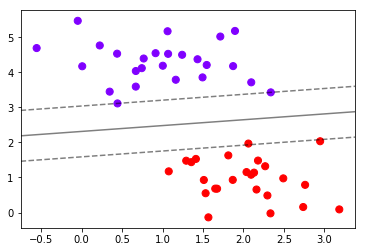

In [11]:
#首先要有散点图
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图  就是上面的散点图

#画决策边界和平行于决策边界的超平面
ax.contour(axisx,axisy,Z#横坐标和纵坐标和高度
           ,colors='k'
           ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线 到决策边界距离为0，-1,1的三条线
           ,alpha=0.5#透明度
           ,linestyles=["--","-","--"] #虚线的是平行的超平面
          )
ax.set_xlim(xlim) #横坐标等于xlim
ax.set_ylim(ylim) #纵坐标等于ylim

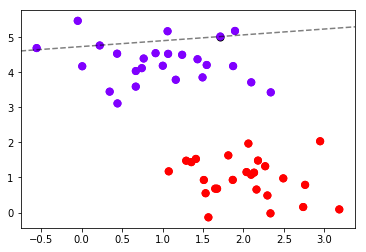

In [12]:
#记得Z的本质么？是输入的样本到决策边界的距离，而contour函数中的level其实是输入了这个距离
#让我们用一个点来试试看
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="black",s=50,cmap="rainbow") #第十个点

clf.decision_function(X[10].reshape(1,2)) #返回-3.33917354
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-3.33917354]
           ,alpha=0.5
           ,linestyles=["--"])

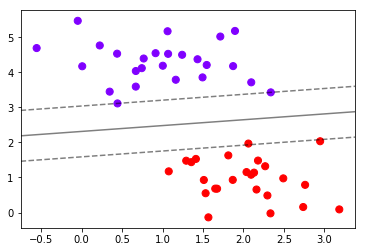

In [13]:
#将上述过程包装成函数
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
#则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [14]:
'''探索建好的模型'''
clf.predict(X)
#根据决策边界，对X中的样本进行分类，返回的结构为n_samples

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [15]:
clf.score(X,y)
#返回给定测试数据和标签的平均准确度

1.0

In [16]:
clf.support_vectors_
#返回支持支持向量 观察上图 穿过超平面（虚线）的点就是支持向量

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [17]:
clf.n_support_
#返回每个类中支持向量的个数

array([2, 1])

#### 推广到非线性情况
我们之前所讲解的原理，以及绘图的过程，都是基于数据本身是线性可分的情况。如果把数据推广到非线性数据，比如说环形数据上呢？

X.shape:(100, 2)
y.shape:(100,)


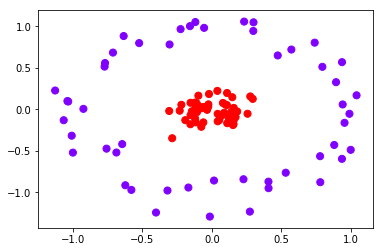

In [18]:
from sklearn.datasets import make_circles #画环形数据的函数
X,y = make_circles(100,factor=0.1,noise=0.1) #100个样本
print('X.shape:{}'.format(X.shape))
print('y.shape:{}'.format(y.shape))

#把两个环画出来
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.show()

0.67


'明显，现在线性SVM已经不适合于我们的状况了，我们无法找出一条直线来划分我们的数据集，让直线的两边分别是两种类别。这个时候，如果我们\n能够在原本的X和y的基础上，添加一个维度r，变成三维，我们可视化这个数据，来看看添加维度让我们的数据如何变化'

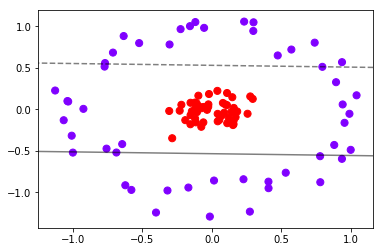

In [19]:
#用之前已经定义的函数来划分这个数据的决策边界
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)
print(clf.score(X,y)) #训练误差已经很大了
'''明显，现在线性SVM已经不适合于我们的状况了，我们无法找出一条直线来划分我们的数据集，让直线的两边分别是两种类别。这个时候，如果我们
能够在原本的X和y的基础上，添加一个维度r，变成三维，我们可视化这个数据，来看看添加维度让我们的数据如何变化'''

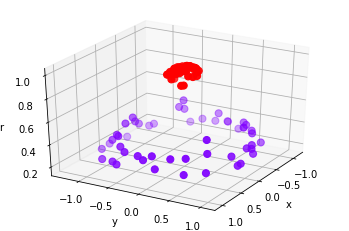

In [20]:
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))

rlim = np.linspace(min(r),max(r),100) #最小值到最大值之间取100个值

from mpl_toolkits import mplot3d #画3D图的库

#定义一个绘制三维图像的函数
#elev表示上下旋转的角度
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")#建立一个用来画3d图的子图
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')#画3D点图 r作为第三个轴 颜色y 
    ax.view_init(elev=elev,azim=azim) #调整初始角度
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

plot_3D()

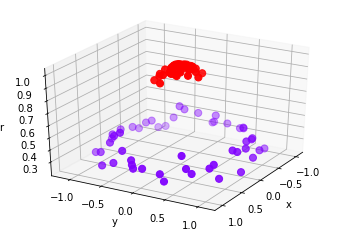

'此时我们的数据在三维空间中，我们的超平面就是一个二维平面。明显我们可以用一个平面将两类数据隔开，这个平面就是我们的决策边界了。我们刚才做的，计算r，\n并将r作为数据的第三维度来将数据升维的过程，被称为“核变换”，即是将数据投影到高维空间中，以寻找能够将数据完美分割的超平面，即是说寻找能够让数据线性可分\n的高维空间。'

In [21]:
%matplotlib inline
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

r = np.exp(-(X**2).sum(1))

rlim = np.linspace(min(r),max(r),100)

from mpl_toolkits import mplot3d

def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()

from ipywidgets import interact,fixed #jupyter lab尚未支持 jupyter notebook支持
interact(plot_3D,elev=[0,30,60,90,120],azip=(-180,180),X=fixed(X),y=fixed(y)) #elev 横向翻转角度 azip纵向翻转角度
plt.show()
'''此时我们的数据在三维空间中，我们的超平面就是一个二维平面。明显我们可以用一个平面将两类数据隔开，这个平面就是我们的决策边界了。我们刚才做的，计算r，
并将r作为数据的第三维度来将数据升维的过程，被称为“核变换”，即是将数据投影到高维空间中，以寻找能够将数据完美分割的超平面，即是说寻找能够让数据线性可分
的高维空间。'''

![Title](1580968695(1).jpg)

###### poly多项式核可以解决线性和非线性问题，但更擅长线性问题
###### sigmoid双曲正切核解决的问题是非线性的，不擅长线性问题
###### rbf高斯径向基也成高斯核函数，解决线性和非线性问题，更擅长非线性

D:\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


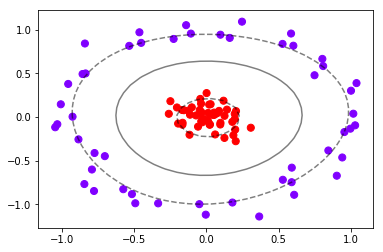

In [22]:
'''我们之前画图使用的是linear 自然不能处理像环形数据这样的非线性的状况'''
#下面用kernel rbf来找出决策边界
clf = SVC(kernel='rbf').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
plot_svc_decision_function(clf)

### 案例：如何选取最佳的核函数

In [23]:
'''通过绘制SVC在不同核函数下的决策边界并计算SVC在不同核函数下分类准确率来观察核函数的效用'''
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap #色彩块
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_moons, make_blobs,make_classification #圆形数据 月亮型数据 簇型数据 对半分分类的数据

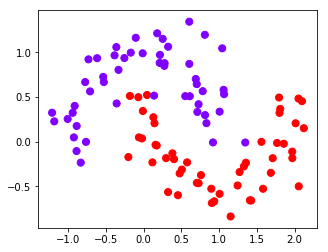

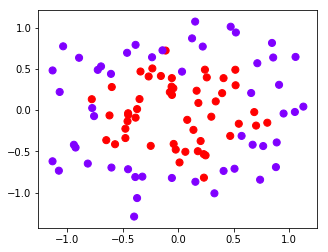

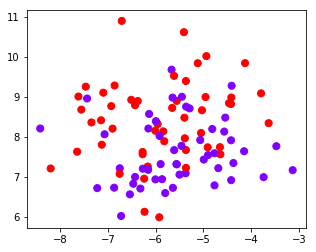

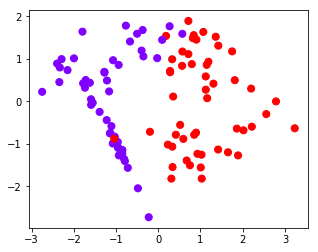

In [24]:
n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),#两个中心
    make_classification(n_samples=n_samples,n_features = 2,n_informative=2,n_redundant=0, random_state=5)
    #n_features 2个特征 n_informative=2 带信息的是2个 n_redundant=0 不带信息的是0个
]

Kernel = ["linear","poly","rbf","sigmoid"]

#四个数据集分别是什么样子呢？
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='rainbow')

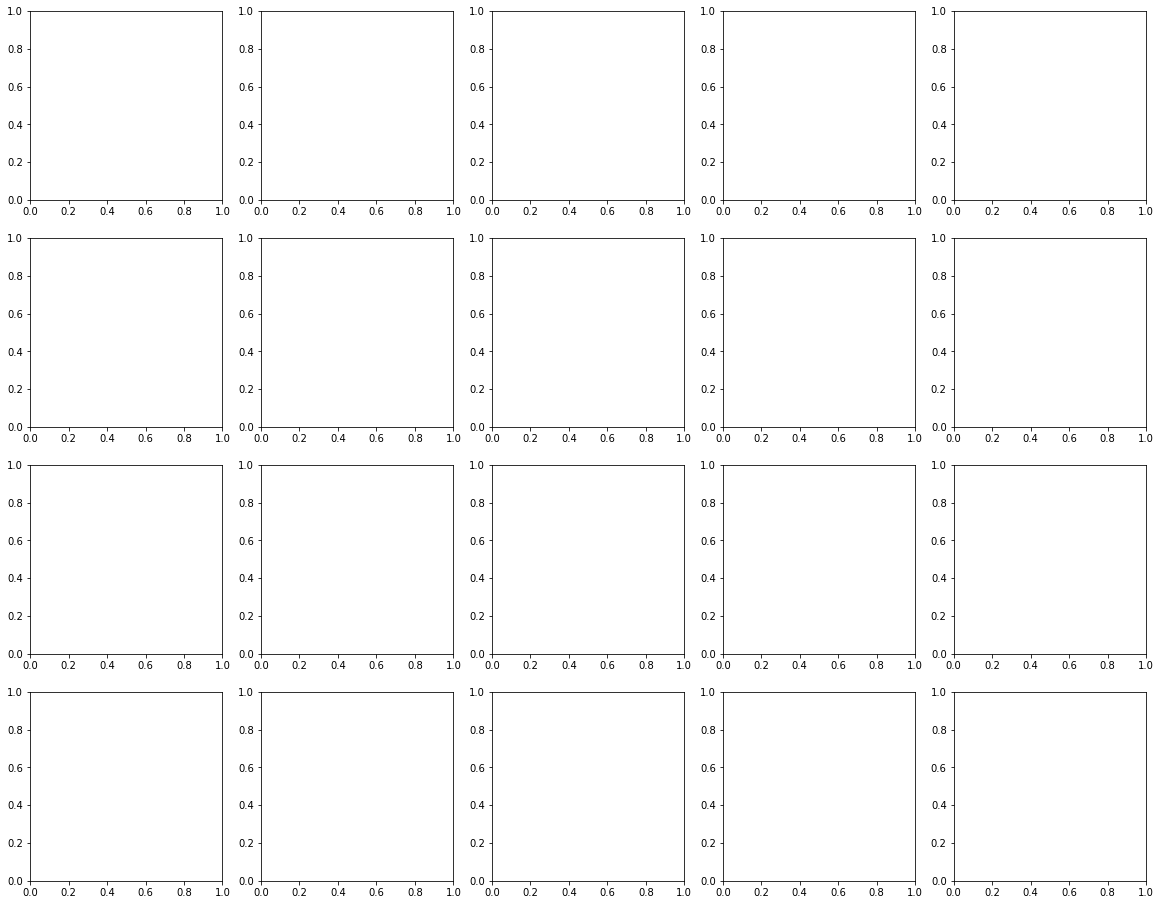

In [25]:
#构件子图 第一列是原始数据的样子 之后每一列都是不同的核函数 
nrows = len(datasets)
ncols = len(Kernel) + 1

fig,axes = plt.subplots(nrows,ncols,figsize=(20,16))  

###### 开始进行子图循环

D:\anaconda\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
D:\anaconda\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
D:\anaconda\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


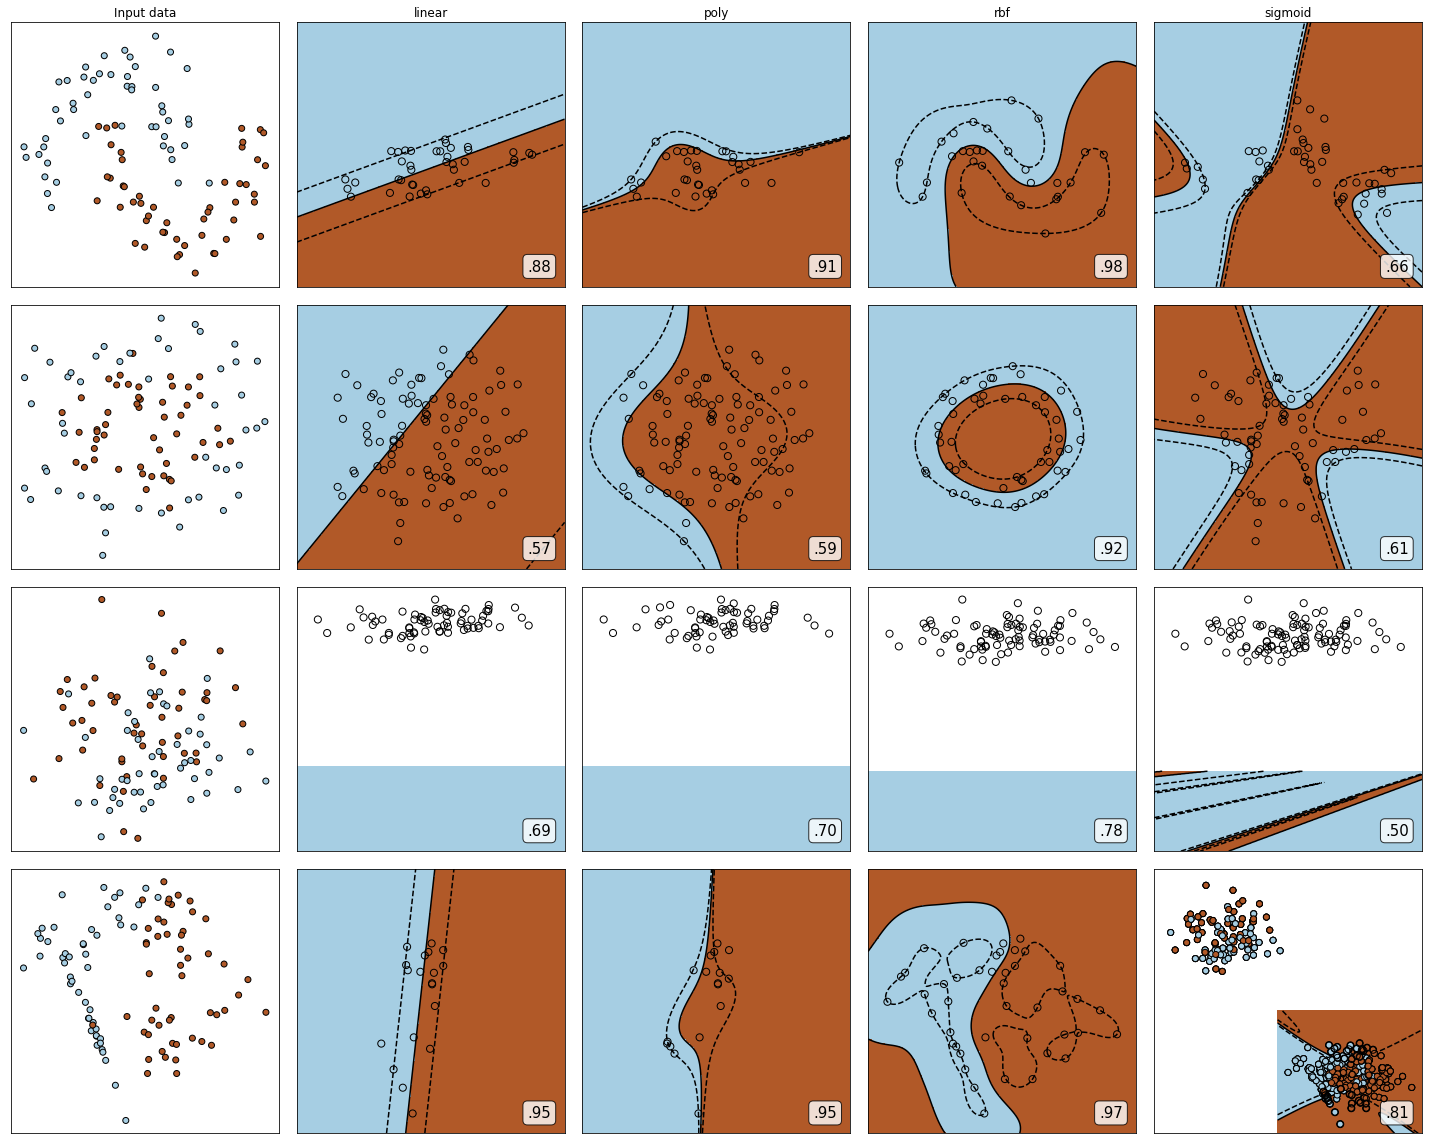

'无论如何先试试看高斯径向基核函数，它适用于核转换到很高的空间的情况，在各种情况下往往效果都很不错，如果rbf效果不好，那我们再试试看其他的核函数。\n另外，多项式核函数多被用于图像处理之中'

In [26]:
#构件子图 第一列是原始数据的样子 之后每一列都是不同的核函数 
nrows = len(datasets)
ncols = len(Kernel) + 1

fig,axes = plt.subplots(nrows,ncols,figsize=(20,16))  

#第一层循环，在不同的数据集中循环
for ds_cnt,(X,Y) in enumerate(datasets):
    
    #在图像第一列，放置原数据分布
    ax = axes[ds_cnt,0]
    if ds_cnt == 0:
        ax.set_title('Input data')
    ax.scatter(X[:,0],X[:,1],c=Y,zorder=10,
               cmap=plt.cm.Paired,edgecolors='k')#zorder表示想要散点图位于子图的哪一个层级 edgecolors散点边缘的颜色
    ax.set_xticks(()) #横纵坐标都为空
    ax.set_yticks(())
    
    #第二层循环，在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        
        #定义子图位置
        ax = axes[ds_cnt,est_idx+1]
        
        #建模
        clf = SVC(kernel=kernel,gamma=2).fit(X,Y)
        score = clf.score(X,Y) #训练的拟合打分
        
        #绘制图像本身分布的散点图
        plt.scatter(X[:,0],X[:,1],c=Y,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
        
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=50,
                   facecolors='none',zorder=10,edgecolors='k')#facecolors = none颜色是透明的 s比原来的大
        
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        
        #p.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数据，并且结束值被包含在内
        XX,YY = np.mgrid[x_min:x_max:200j,x_min:x_max:200j]
        #np.c_类似于np.vstack的功能 decision_function计算所有点的距离
        Z = clf.decision_function(np.c_[XX.ravel(),YY.ravel()]).reshape(XX.shape) #.vavel()降维 np.c_将二者结合在一起
        #填充等高线下不同区域的颜色
        ax.pcolormesh(XX,YY,Z>0,cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-1, 0, 1])
        
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数
        ax.text(0.95,0.06,('%.2f' % score).lstrip('0') #0.95 横位置 0.06纵位置
                ,size = 15
                ,bbox = dict(boxstyle='round', alpha=0.8, facecolor='white')
                #为分数添加一个白色的格子作为底色
                ,transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                ,horizontalalignment='right' #位于坐标轴的什么方向
               )
        
plt.tight_layout()
plt.show()
'''无论如何先试试看高斯径向基核函数，它适用于核转换到很高的空间的情况，在各种情况下往往效果都很不错，如果rbf效果不好，那我们再试试看其他的核函数。
另外，多项式核函数多被用于图像处理之中'''

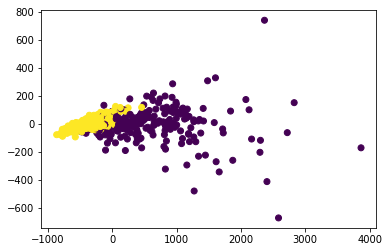

The accuracy under kernel linear is 0.929825
00:00:355051
The accuracy under kernel poly is 0.923977
00:00:045877
The accuracy under kernel rbf is 0.596491
00:00:023987
The accuracy under kernel sigmoid is 0.596491
00:00:007926


In [29]:
'''案例：在乳腺癌数据集上探索核函数的性质'''

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

#实例化
data = load_breast_cancer()
x = data.data #data.shape (569,30)
y = data.target

#PCA降维
from sklearn.decomposition import PCA
x_dr = PCA(2).fit_transform(x) #由30特征变成了只有两列的特征

plt.scatter(x_dr[:,0],x_dr[:,1],c=y)
plt.show()

'''
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
data = pd.DataFrame(x)
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T
'''

#再一次对数据集进行分类
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=420)
kernel_kind = ["linear", "poly", "rbf", "sigmoid"]
for i in kernel_kind:
    time0 = time()
    clf = SVC(kernel = i
              , gamma = "auto"
              , degree = 1 #多项式核函数的次数 默认为3 当为3时在此数据集上计算量巨大 线性关系就能取得不错的结果 故选degree=1
              #多项式核函数poly degree为1的时候就可以当做线性核函数来用
              , cache_size= 1500 #允许使用多大的内存来进行计算 单位MB
              ).fit(xtrain, ytrain)  #用训练集找出决策边界
    print("The accuracy under kernel %s is %f" % (i, clf.score(xtest, ytest))) #%s 字符 %f 浮点数
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

In [30]:
'''为什么rbf效果糟糕？
这里的问题是数据的量纲问题'''

'为什么rbf效果糟糕？\n这里的问题是数据的量纲问题'

In [31]:
# 探索一下乳腺癌数据集的量纲
import pandas as pd
data = pd.DataFrame(x)
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T #还可以看到数据的均值 方差 最大值最小值
'''可以发现存在严重的量纲不统一的数据'''
'''而且还存在偏态问题'''

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


###### 标准化

In [32]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)
data = pd.DataFrame(X)
data.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [33]:
'''标准化完毕后，再次让SVC在核函数中遍历，此时我们把degree的数值设定为1，观察各个核函数在去量纲后的数据上的表现'''
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=420)
kernel_kind = ["linear", "poly", "rbf", "sigmoid"]
for i in kernel_kind:
    time0 = time()
    clf = SVC(kernel = i
              , gamma = "auto"
              , degree = 1 #多项式核函数的次数 默认为3 当为3时在此数据集上计算量巨大 线性关系就能取得不错的结果 故选degree=1
              #多项式核函数poly degree为1的时候就可以当做线性核函数来用
              , cache_size= 1500 #允许使用多大的内存来进行计算 单位MB
              ).fit(xtrain, ytrain)  #用训练集找出决策边界
    print("The accuracy under kernel %s is %f" % (i, clf.score(xtest, ytest))) #%s 字符 %f 浮点数
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:014960
The accuracy under kernel poly is 0.964912
00:00:004988
The accuracy under kernel rbf is 0.970760
00:00:007978
The accuracy under kernel sigmoid is 0.953216
00:00:003993


##### 量纲统一之后，可以观察到，所有的核函数的运算结果都大大减少了，尤其是对于线性核来说，而多项核函数居然变成了计算最快的，其次，rbf表现出了非常优秀的结果，所以：
1.线性核，尤其是多项式核函数在高次项时计算非常缓慢

2.rbf和多项式核函数都不擅长处理量纲不统一的数据集

因此，在SVM执行之前，非常推荐先进行数据的无量纲化

选取与核函数相关的参数：degree & gamma & coef0
在知道如何选取核函数后，我们还要观察一下除了kernel之外的核函数相关的参数。对于线性核函数，"kernel"是唯一能够影响它的参数，但是对于其他三种非线性核函数，
他们还受到参数gamma，degree以及coef0的影响。参数gamma就是表达式中的，degree就是多项式核函数的次数，参数coef0就是常数项。其中，高斯径向基核函数受到gamma
的影响，而多项式核函数受到全部三个参数的影响。

![Title](1581062567(1).jpg)

![Title](1581062618(1).jpg)

0.9766081871345029 0.012067926406393264


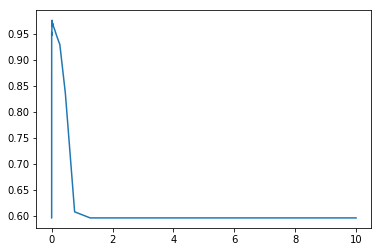

In [37]:
'''我们往往避免去真正探究这些参数如何影响了我们的核函数，而直接使用学习曲线或者网格搜索来帮助我们查找最佳的参数组合'''
score = []
gamma_range = np.logspace(-10,1,50) #返回在对数刻度上均匀间隔的数字 [起始值，终止值，取出的数字数目] 每个数字都是对数的形式
for i in gamma_range:
    clf = SVC(kernel='rbf',gamma=i,cache_size=1500).fit(xtrain,ytrain)
    score.append(clf.score(xtest,ytest))
print(max(score),gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

In [38]:
'''但对于多项式核函数来说，就没有那么容易了，因为三个参数共同作用在一个数学公式上影响它的效果，因此我们往往使用网格搜索来共同调整三个对多项式核函数有影响的参数'''
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV #带交叉验证的网格搜索

time0 = time()

#degree没有参与调整，因为通过之前的探索我们可以知道，在乳腺癌数据集上 用多项式核函数的基础上 degree取1能达到最好的效果 所以我们degree之间等于1 不参与网格搜索
gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)

param_grid = dict(gamma = gamma_range,coef0 = coef0_range)

cv = StratifiedShuffleSplit(n_splits=5,test_size=0.3,random_state=420)#交叉验证的模式 数据集分成5份 test集30%
grid = GridSearchCV(SVC(kernel='poly',degree=1,cache_size=1500)
                    ,param_grid=param_grid
                    ,cv=cv) #参数 模型 参数 交叉验证的模式

grid.fit(X,y)

print("The best parameters are %s with a score of %0.5f" % (grid.best_params_, grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The best parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
00:10:179574


分数比调参前有所增加，但依然没有超过线性核函数rbf的结果

可见，如果最初选择核函数的时候，你就发现多项式的结果不如rbf和线性核函数，那就不要挣扎了，试试看调整rbf或者直接使用线性

## 硬间隔和软间隔：重要参数C

硬间隔和软间隔：当两组数据是完全线性可分，我们可以找出一个决策边界使得训练集上的分类误差为0，这两种数据就被称为是存在”硬间隔“的。当两组数据几乎是完全线性可分的，但决策边界在训练集上存在较小的训练误差，这两种数据就被称为是存在”软间隔“

我们可以通过调整我们对决策边界的定义，将硬间隔时得出的数学结论推广到软间隔的情况上，让决策边界能够忍受一小部分训练误差。这个时候，我们的决策边界就不是单纯地寻求最大边际了，因为对于软间隔地数据来说，边际越大被分错的样本也就会越多，因此我们需要找出一个”最大边际“与”被分错的样本数量“之间的平衡。

![Title](1581067483(1).jpg)

0.9766081871345029 1.2340816326530613


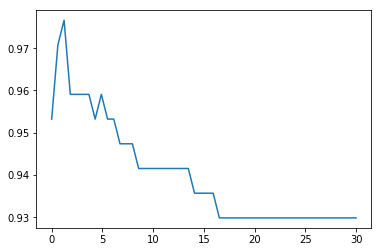

In [40]:
'''参数C用于权衡将训练样本的正确分类与决策函数的边际最大化的效力'''
#调线性核函数

score = []
C_range = np.linspace(0.01,30,50)

for i in C_range:
    clf = SVC(kernel='linear',C=i,cache_size=1500).fit(xtrain,ytrain)
    score.append(clf.score(xtest,ytest))
    
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 6.130408163265306


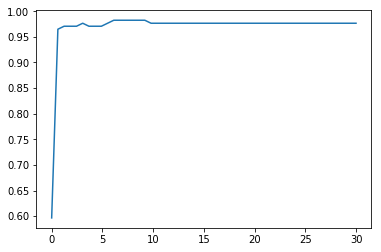

In [41]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50)

for i in C_range:
    clf = SVC(kernel='rbf',C=i,gamma=0.012742749857031322,cache_size=1500).fit(xtrain,ytrain)
    score.append(clf.score(xtest,ytest))
    
print(max(score),C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 5.938775510204081


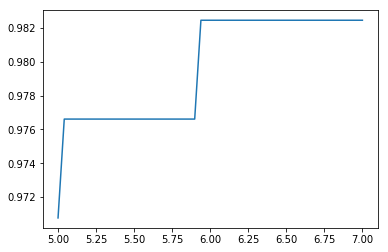

In [43]:
#进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012742749857031322,cache_size=5000).fit(xtrain,ytrain)
    score.append(clf.score(xtest,ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()